In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/iris_synthetic_data.csv")  # or whatever the file is named
df.head()


,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa


In [4]:
print(df.shape)        # Rows, Columns
print(df.columns)      # Names of features


(3000, 5)
Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'label'], dtype='object')


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  3000 non-null   float64
 1   sepal width   3000 non-null   float64
 2   petal length  3000 non-null   float64
 3   petal width   3000 non-null   float64
 4   label         3000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 117.3+ KB


In [6]:
print(df['label'].value_counts())


label
Iris-setosa        1000
Iris-versicolor    1000
Iris-virginica     1000
Name: count, dtype: int64


In [7]:
df.isnull().sum()       # Check missing values
df.duplicated().sum()   # Check duplicate rows


np.int64(2254)

In [8]:
print(df.shape)


(3000, 5)


In [ ]:
df.describe()


,sepal length,sepal width,petal length,petal width
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,5.865267,3.051833,3.767367,1.191000
std,0.805073,0.412472,1.751183,0.758022
min,4.300000,2.000000,0.900000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.200000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Seeing distribution of data

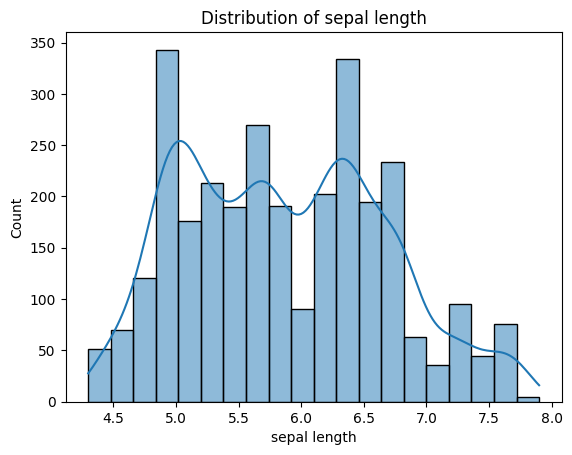

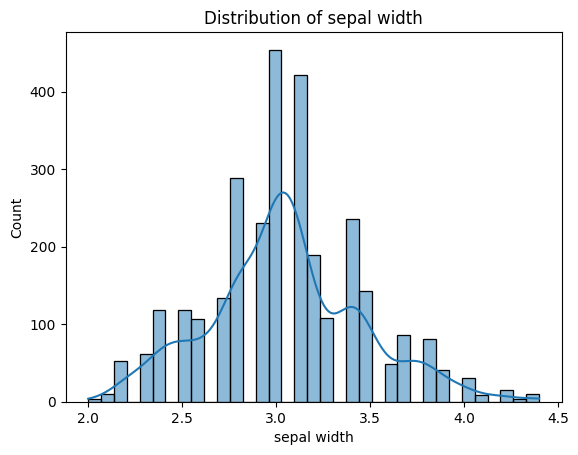

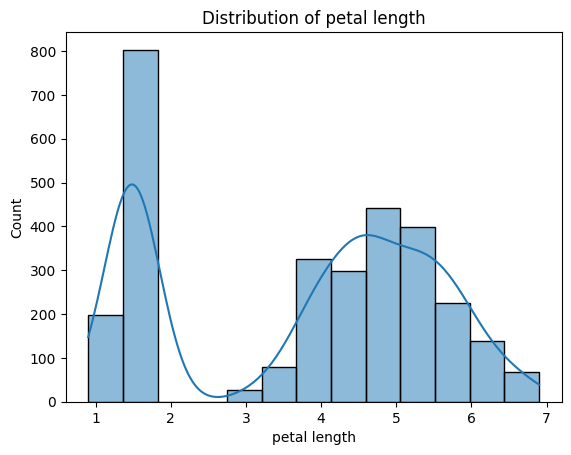

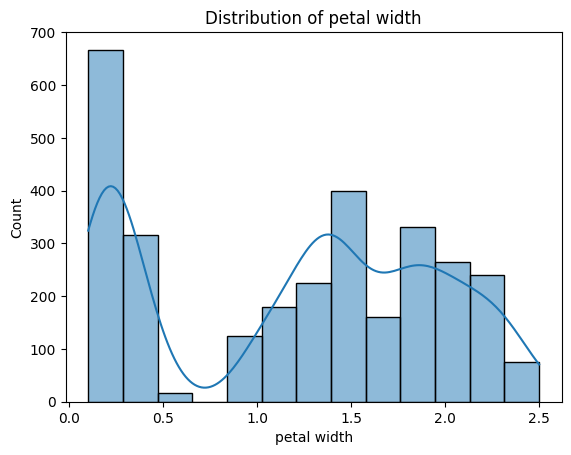

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns[:-1]:  # Assuming last column is 'label'
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


conerting label column to numeric to calculate correlation of features with label

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy so original df is not affected
df_encoded = df.copy()

# Convert 'label' column to numeric
le = LabelEncoder()
df_encoded['label'] = le.fit_transform(df_encoded['label'])  # e.g., Setosa → 0, Versicolor → 1, Virginica → 2


checking for outliers

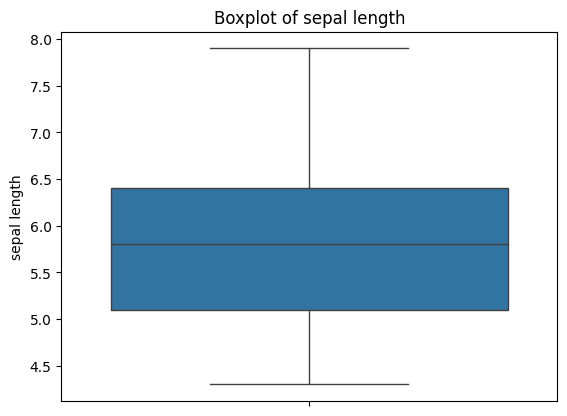

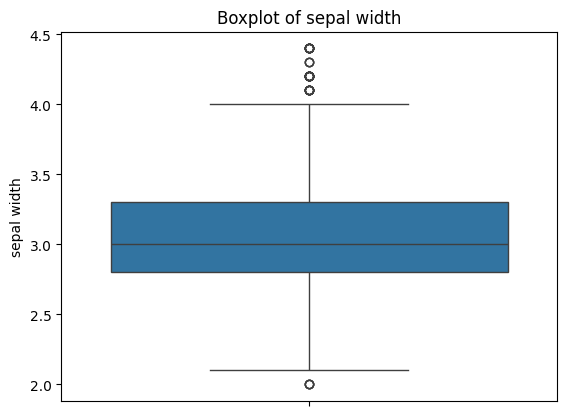

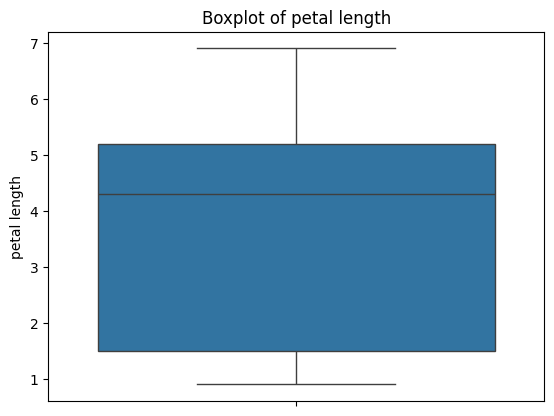

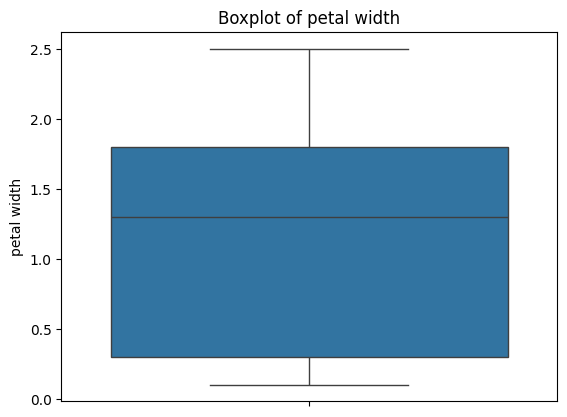

In [10]:
for col in df.columns[:-1]:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Pair Plot / Scatter Matrix

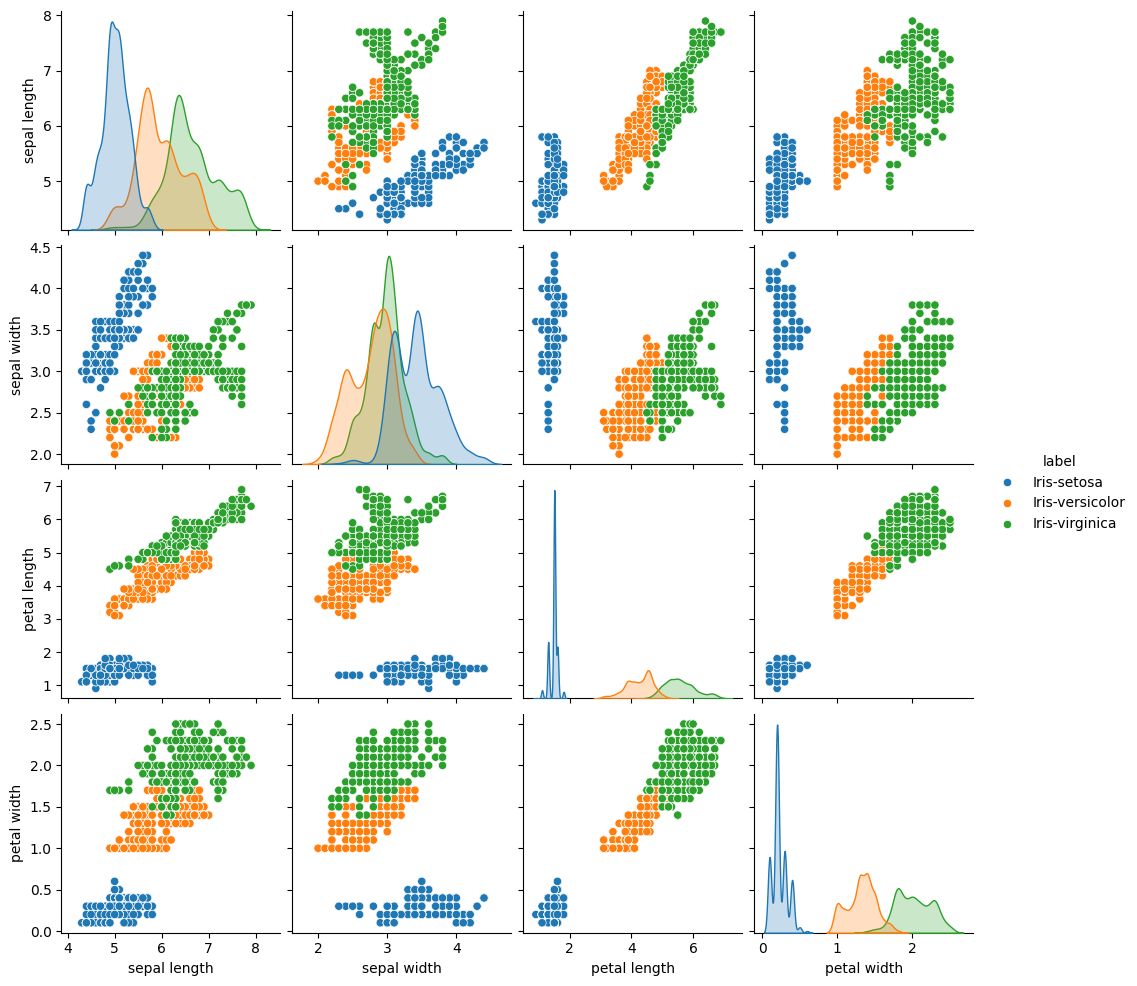

In [11]:
sns.pairplot(df, hue='label')


checking skewness

In [13]:
from scipy.stats import skew, kurtosis

for col in df.columns[:-1]:
    print(f"{col} - Skewness: {skew(df[col])}")


sepal length - Skewness: 0.27012327638957667
sepal width - Skewness: 0.28685626498548766
petal length - Skewness: -0.27668675202816084
petal width - Skewness: -0.14398490852761858


correlation matrix

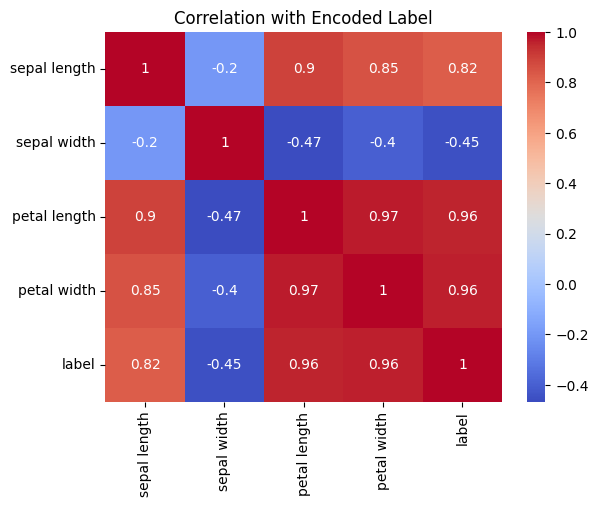

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr_matrix = df_encoded.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation with Encoded Label")
plt.show()


Now dropping petal width,sepal width

In [15]:
# Drop 'sepal width (cm)' and 'petal width (cm)' columns
df = df.drop(['sepal width', 'petal width'], axis=1)


In [17]:
print(df.shape)

(3000, 3)


In [18]:
df.duplicated().sum()


np.int64(2753)

In [19]:
df[df.duplicated()]


,sepal length,petal length,label
3,5.2,1.5,Iris-setosa
6,5.2,1.5,Iris-setosa
8,4.9,1.5,Iris-setosa
9,5.2,1.5,Iris-setosa
11,5.0,1.5,Iris-setosa
...,...,...,...
2995,7.2,6.0,Iris-virginica
2996,7.3,6.2,Iris-virginica
2997,6.9,5.7,Iris-virginica
2998,7.5,6.0,Iris-virginica


In [23]:
df = df.drop_duplicates()
df.duplicated().sum()




np.int64(0)